<a href="https://colab.research.google.com/github/PrathamBorkar/facial-expressions/blob/main/fcr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("davilsena/ckdataset")

print("Path to dataset files:", path)

100%|██████████| 2.48M/2.48M [00:00<00:00, 39.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/davilsena/ckdataset/versions/2


In [ ]:
path

'/root/.cache/kagglehub/datasets/davilsena/ckdataset/versions/2'

In [ ]:
import pandas as pd
df=pd.read_csv(path+'/CK+48.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/davilsena/ckdataset/versions/2/CK+48.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Fer/ckextended.csv')

In [ ]:
df.head()

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training


In [ ]:
print(df.head())

   emotion                                             pixels     Usage
0        6  36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...  Training
1        6  88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...  Training
2        6  9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...  Training
3        6  104 106 108 104 95 50 60 61 58 83 126 133 139 ...  Training
4        6  68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...  Training


In [ ]:
print(df["emotion"].unique)

<bound method Series.unique of 0      6
1      6
2      6
3      6
4      6
      ..
915    5
916    5
917    5
918    5
919    5
Name: emotion, Length: 920, dtype: int64>


<Axes: xlabel='emotion', ylabel='count'>

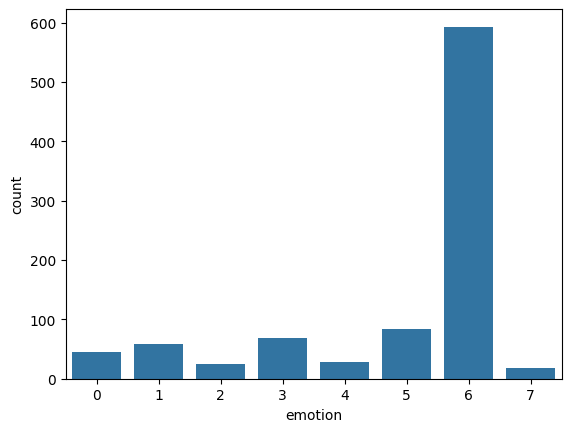

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='emotion',data=df)


([<matplotlib.patches.Wedge at 0x7bac4bada610>,
 [Text(-0.4825833711736874, 0.9884904095977054, '6'),
  Text(-0.40703160174655817, -1.0219223430278992, '5'),
  Text(0.15350374486441515, -1.089236705364174, '3'),
  Text(0.60015267767128, -0.9218550664198755, '1'),
  Text(0.8832485291753273, -0.6556462733133022, '0'),
  Text(1.0176990270569217, -0.41747896992231237, '4'),
  Text(1.0762219928719161, -0.22747795950113825, '2'),
  Text(1.0979227215572598, -0.06756994515537224, '7')])

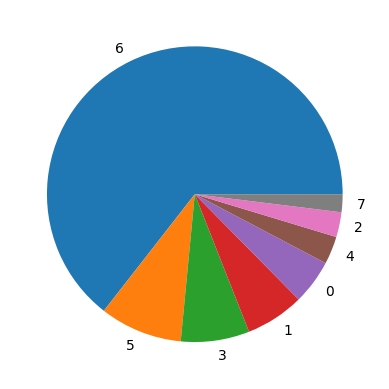

In [ ]:
plt.pie(df['emotion'].value_counts(),labels=df['emotion'].value_counts().index)

In [ ]:
import numpy as np

# Function to preprocess a single row of pixels
def preprocess_pixels(pixels):
    pixels = np.array([int(p) for p in pixels.split()], dtype=np.uint8)
    return pixels.reshape(48, 48)  # Reshape into a 48x48 image

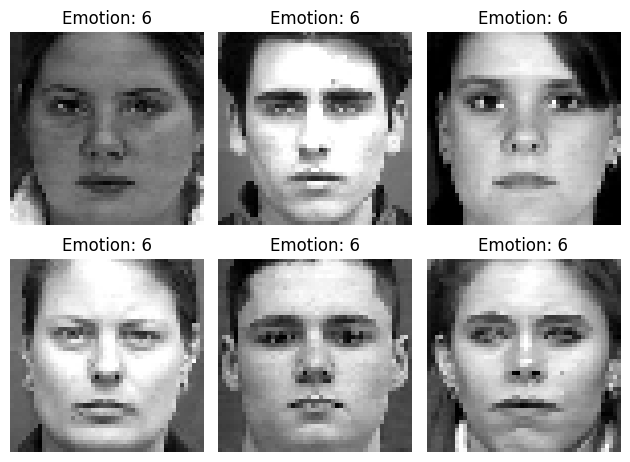

In [ ]:
for i in range(6):  # Show 6 images
    image = preprocess_pixels(df['pixels'][i])
    label = df['emotion'][i]

    plt.subplot(2, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Emotion: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def normalize_pixels(pixels):
    pixels = np.array([int(p) for p in pixels.split()], dtype=np.uint8)
    return pixels / 255.0

normalized_image = normalize_pixels(df['pixels'][0])
print("First 10 normalized pixel values:", normalized_image[:10])


First 10 normalized pixel values: [0.14117647 0.15294118 0.1372549  0.09803922 0.0745098  0.04313725
 0.03137255 0.02745098 0.01176471 0.05098039]


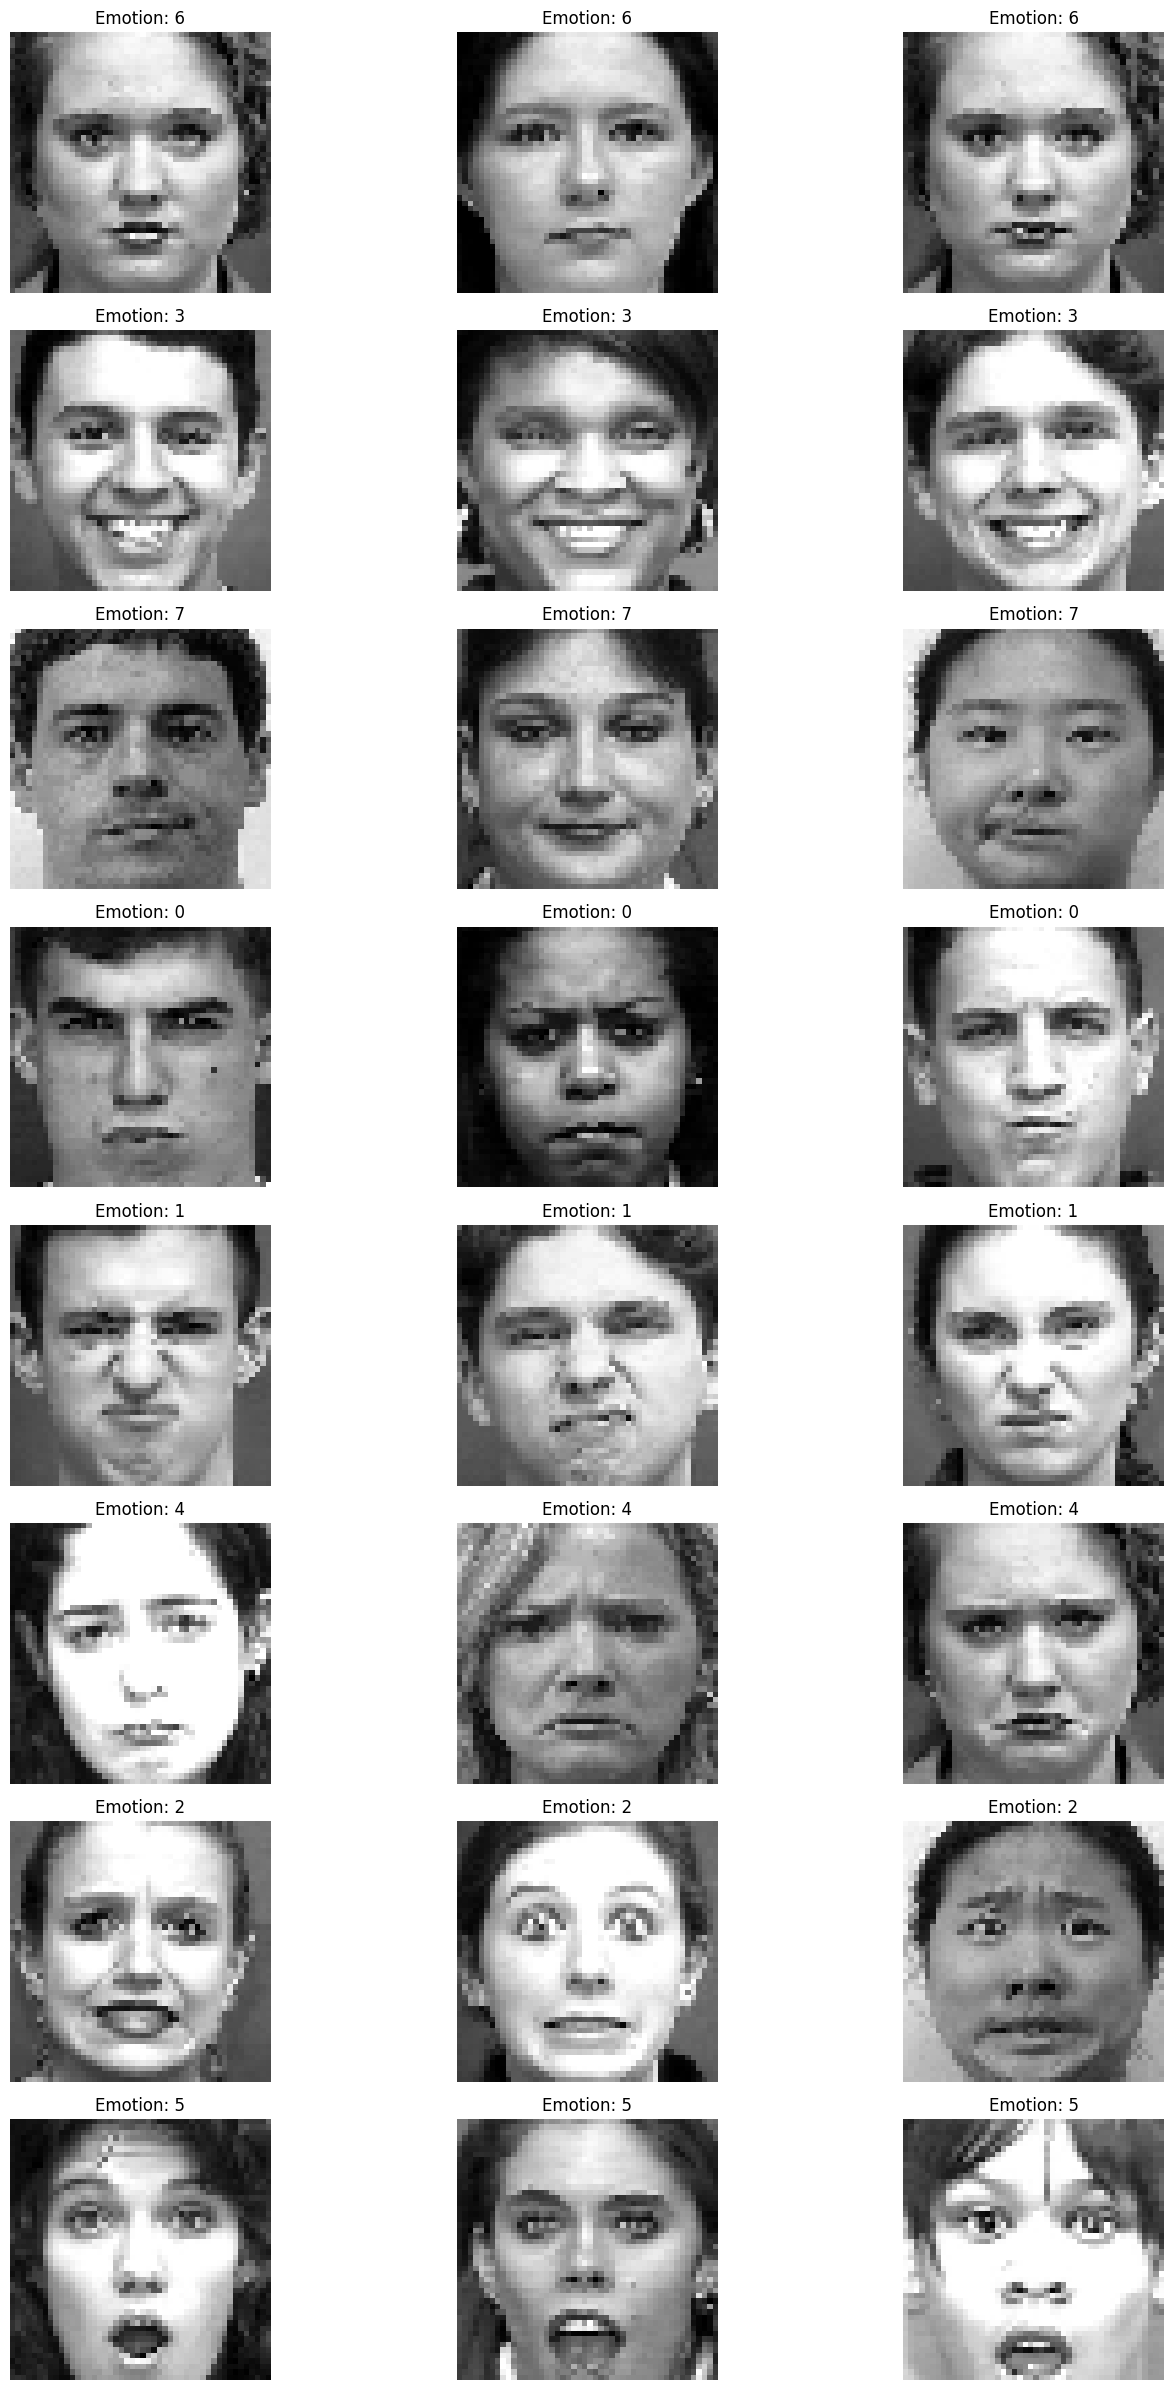

In [ ]:
import random

# Function to display random images for each emotion
def display_random_images(df, num_images=3):
    unique_emotions = df['emotion'].unique()

    plt.figure(figsize=(15, len(unique_emotions) * 3))
    for i, emotion in enumerate(unique_emotions):
        emotion_data = df[df['emotion'] == emotion]
        samples = emotion_data.sample(num_images)

        for j, (_, row) in enumerate(samples.iterrows()):
            image = preprocess_pixels(row['pixels'])
            plt.subplot(len(unique_emotions), num_images, i * num_images + j + 1)
            plt.imshow(image, cmap='gray')
            plt.title(f"Emotion: {emotion}")
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Display images
display_random_images(df)


In [ ]:
sample_image = preprocess_pixels(df['pixels'][0])
print("Shape of one image:", sample_image.shape)

Shape of one image: (48, 48)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['pixels'], df['emotion'], test_size=0.2, random_state=42)

In [ ]:
from torch.utils.data import Dataset ,DataLoader
import torch

class facialexpressiondataset(Dataset):
  def __init__(self,data,transform=None):
    self.images=data['pixels'].apply(self.preprocess_pixels).values
    self.labels=data['emotion'].values
    self.transform=transform

  def preprocess_pixels(self,pixels):
    pixels=np.array([int(p) for p in pixels.split()],dtype=np.uint8)
    pixels=pixels/255.0
    return pixels.reshape(48,48)

  def __len__(self):
    return len(self.images)

  def __getitem__(self, idx):
        image = torch.tensor(self.images[idx],dtype=torch.float32).unsqueeze(0)  # Add channel dimensionunsqueeze(0):
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        if self.transform:
            image = self.transform(image)

        return image, label
train_dataset = facialexpressiondataset(pd.DataFrame({'pixels': x_train, 'emotion': y_train}))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Adjust batch_size as needed


In [ ]:
import torch.nn as nn

class facialexpressiondataset(nn.Module):
  def __init__(self):
    super(facialexpressiondataset,self).__init__()
    self.conv_layer=nn.Sequential(
        nn.Conv2d(1,32,kernel_size=3,padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        nn.Conv2d(32,64,kernel_size=3,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),

    )

    self.fc_layer=nn.Sequential(
        nn.Flatten(),
        nn.Linear(64*12*12,1024),
        nn.ReLU(),
        nn.Dropout(0.5),
        nn.Linear(1024,8), # Changed output size to 8 to accommodate labels 0 to 7
    )

  def forward(self,x):
    x=self.conv_layer(x)
    x=self.fc_layer(x)
    return x

In [ ]:
import torch.optim as optim

model = facialexpressiondataset()  # Create an instance of your model class
criterion = nn.CrossEntropyLoss()  # Multi-class classification loss
optimizer = optim.Adam(model.parameters(), lr=0.0001)


In [ ]:
import torch

device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
num_epochs=30
for epoch in range( num_epochs):
  model.train()
  running_loss=0.0
  for images,labels in train_loader:
    images,labels=images.to(device),labels.to(device)
    outputs=model(images)
    loss=criterion(outputs,labels)
    optimizer.zero_grad
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)  # Clip gradients

    optimizer.step()
    running_loss+=loss.item()

  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/30, Loss: 1.4369396023128345
Epoch 2/30, Loss: 1.1346317996149478
Epoch 3/30, Loss: 0.9291122477987538
Epoch 4/30, Loss: 0.7683819597182067
Epoch 5/30, Loss: 0.6326588755068572
Epoch 6/30, Loss: 0.5518205217693163
Epoch 7/30, Loss: 0.4500157314798106
Epoch 8/30, Loss: 0.38518932785676874
Epoch 9/30, Loss: 0.3268609733685203
Epoch 10/30, Loss: 0.30072189219619916
Epoch 11/30, Loss: 0.25126735412556195
Epoch 12/30, Loss: 0.21425434590681738
Epoch 13/30, Loss: 0.19262998097616693
Epoch 14/30, Loss: 0.18379529792329538
Epoch 15/30, Loss: 0.15722876244589037
Epoch 16/30, Loss: 0.13826542461048003
Epoch 17/30, Loss: 0.15509889631167703
Epoch 18/30, Loss: 0.11393024488959623
Epoch 19/30, Loss: 0.09964275028070678
Epoch 20/30, Loss: 0.11763553507626057
Epoch 21/30, Loss: 0.08682150709564271
Epoch 22/30, Loss: 0.06737023883539697
Epoch 23/30, Loss: 0.05841333848302779
Epoch 24/30, Loss: 0.05001384943075802
Epoch 25/30, Loss: 0.0642985014811806
Epoch 26/30, Loss: 0.05194401902996976
Epoc

In [ ]:
model.eval()
correct=0
total=0
with torch.no_grad():
  for images,labels in train_loader:
    images,labels=images.to(device),labels.to(device)
    outputs=model(images)

    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()

print(f"Accuracy on training set: {100*correct/total}%")

Accuracy on training set: 97.28260869565217%


In [ ]:
torch.save(model.state_dict(), 'facial_expression_model.pth')
model.load_state_dict(torch.load('facial_expression_model.pth'))
model.eval()

<ipython-input-38-62add51edcef>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('facial_expression_model.pth'))


facialexpressiondataset(
  (conv_layer): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=9216, out_features=1024, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=1024, out_features=8, bias=True)
  )
)

Predicted: 6, Actual: 6


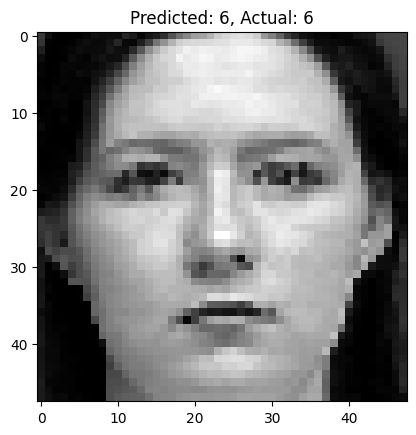

In [ ]:
import matplotlib.pyplot as plt

# Get the first data point and label using .iloc
sample_image, sample_label = x_test.iloc[0], y_test.iloc[0]  # Access using .iloc for position-based indexing
sample_image = preprocess_pixels(sample_image) # Preprocess the sample_image
sample_image = torch.tensor(sample_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device) # Reshape and move to device


output = model(sample_image)
_, predicted_label = torch.max(output, 1)

print(f"Predicted: {predicted_label.item()}, Actual: {sample_label}")
plt.imshow(sample_image.squeeze().cpu(), cmap='gray')
plt.title(f"Predicted: {predicted_label.item()}, Actual: {sample_label}")
plt.show()